# Project: **Lane Finding (Basic Level) using OpenCV** 

**In this project, OpenCV library has been used to detect lane lines on the road. The programming language in which this project has been done is Python**

**Primary source of reference for the code on Lane-Lines-Detection Project: https://github.com/mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV**

**References for Lane Line Detection:**

**I. For test images and videos:**                                                                                                                        
**a) https://gogirl.co.uk/news-and-advice/road-markings-give-way-hatched-lines/**                                                                       
**b) https://github.com/qinnzou/Robust-Lane-Detection**                                                                                                
**c) https://github.com/rslim087a/road-video**                                                                                                         
**d) https://en.wikipedia.org/wiki/Lane**                                                                                                                 
**e) https://github.com/mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV (Primary source)**      

**Other sources of reference:**    
**1)To check opencv version: https://pyimagesearch.com/2015/08/10/checking-your-opencv-version-using-python/**                             
**2)OpenCV Real Time Road Lane Detection: https://www.geeksforgeeks.org/opencv-real-time-road-lane-detection/**                                        
**3)Road Lane Line Detection: https://data-flair.training/blogs/road-lane-line-detection/**                                                         
**4)Line Detection Python OpenCV Houghline Method: https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/**                         
**5)https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/**                                                                                     
**6)https://towardsdatascience.com/a-deep-dive-into-lane-detection-with-hough-transform-8f90fdd1322f**

#### Environment:
-  Windows 11 Operating System
-  Visual Studio Code
-  Python 3.10.4
-  OpenCV 4.7.0

## Loading test images

We have 30 test images. The function called `display_images()` will show all the test images we're working on.

In [34]:
#Import packages which are useful
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from moviepy.editor import VideoFileClip

%matplotlib inline

In [35]:
cv2.__version__

'4.7.0'

In [36]:
# Installing cv2 and moviepy using pip3
#!pip3 install opencv-python
#!pip3 install moviepy

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(list_img, cols=5, rows=6, cmap=None):
    print("Number of input images:", len(list_img))
    fig, axs = plt.subplots(rows, cols, figsize=(11,11))
    print("Number of subplots:", len(axs.flat))
    for i, ax in enumerate(axs.flat):
        print("Processing subplot", i+1)
        if i < len(list_img) and list_img[i] is not None and np.prod(list_img[i].shape) != 0:
            image = list_img[i]
            cmap = 'gray' if len(image.shape) == 2 else cmap
            ax.imshow(image, cmap=cmap)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()


Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


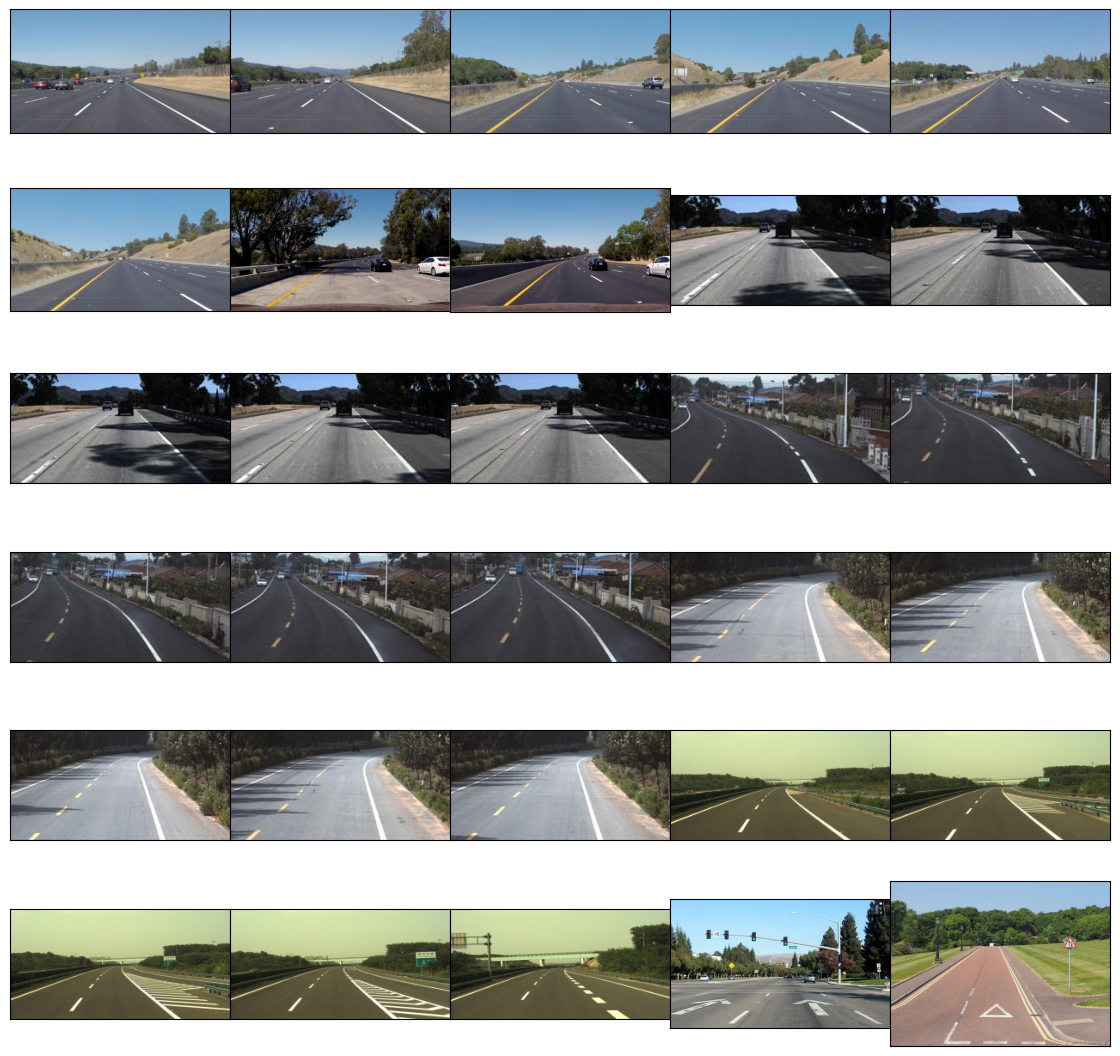

In [38]:
images_list = [plt.imread(img) for img in glob.glob('test_images/*.jpg')]
display_images(images_list)

## Color Selection

Lane lines in the test images are in white and yellow. We need to choose the most suitable color space, that clearly highlights the lane lines.

### Original RGB color selection

In [39]:
def select_white_yellow(image):
    # White color mask
    lower_white = np.array([200, 200, 200], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    white_mask = cv2.inRange(image, lower_white, upper_white)

    # Yellow color mask
    lower_yellow = np.array([175, 175, 0], dtype=np.uint8)
    upper_yellow = np.array([255, 255, 255], dtype=np.uint8)
    yellow_mask = cv2.inRange(image, lower_yellow, upper_yellow)

    # Combine white and yellow masks
    combined_mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked_image = cv2.bitwise_and(image, image, mask=combined_mask)

    return masked_image

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


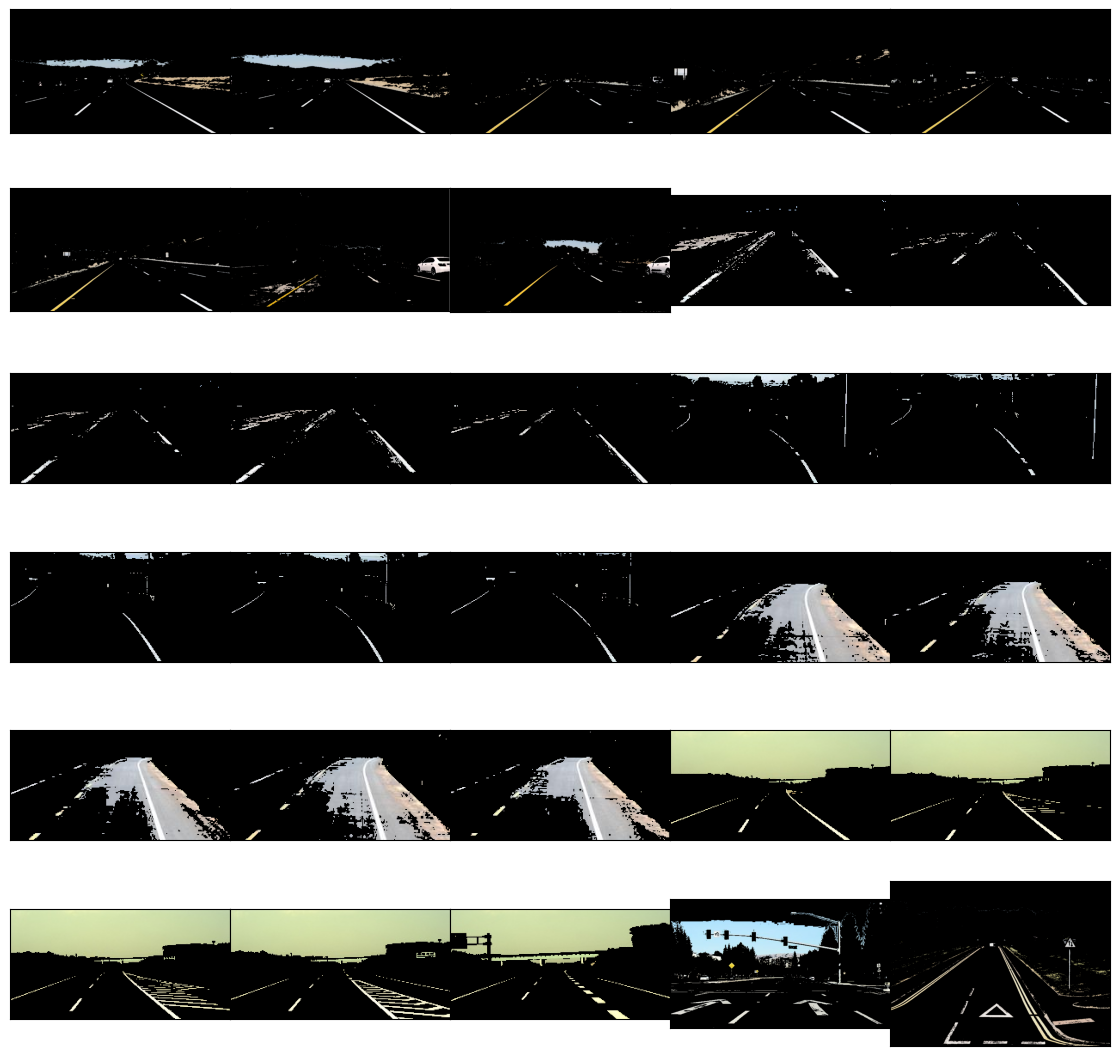

In [40]:
display_images(list(map(select_white_yellow, images_list)))

###  HSV color space

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


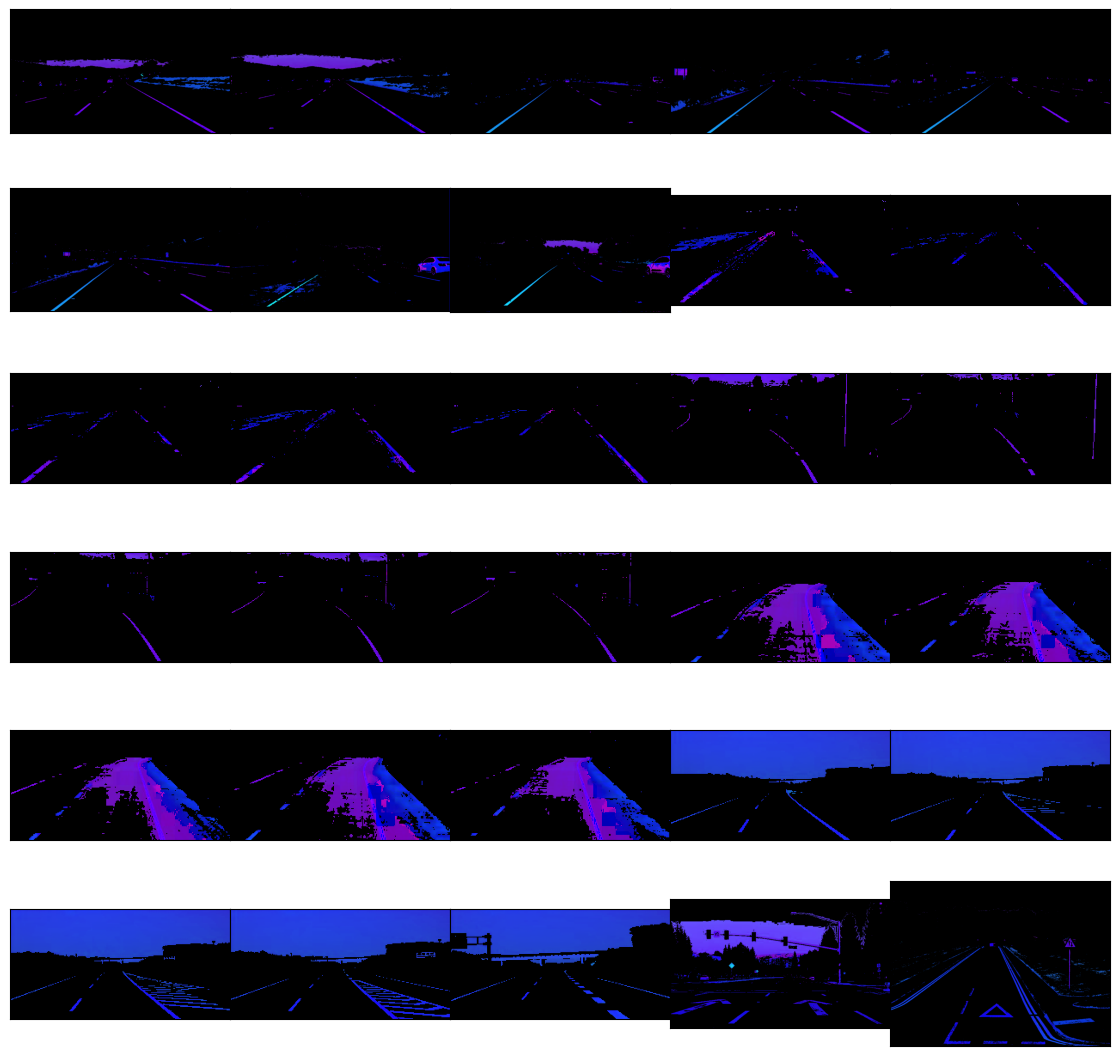

In [41]:
def extract_lane_lines_hsv(img):
    # Select white and yellow colors
    lane_image = select_white_yellow(img)

    # Converted - HSv color space
    extracted_hsv_image = cv2.cvtColor(lane_image, cv2.COLOR_RGB2HSV)
    return extracted_hsv_image

display_images(list(map(extract_lane_lines_hsv, images_list)))


In [42]:
def apply_color_selection(image):
    # Input image is converted to HSV color space
    hsv_image = extract_lane_lines_hsv(image)
    
    
    # Define the lower and upper thresholds for the white color mask
    lower_white = np.uint8([0, 0, 210])
    upper_white = np.uint8([255, 30, 255])
    # Mask of white color is created
    white_mask = cv2.inRange(hsv_image, lower_white, upper_white)
    
    # Define the lower and upper thresholds for the yellow color mask
    lower_yellow = np.uint8([18, 80, 80])
    upper_yellow = np.uint8([30, 255, 255])
    # Mask of yellow color is created
    yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    
    # The white and the yellow masks are combined
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    # Apply the mask to the original image
    img_masked = cv2.bitwise_and(image, image, mask=mask)
    
    return img_masked

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


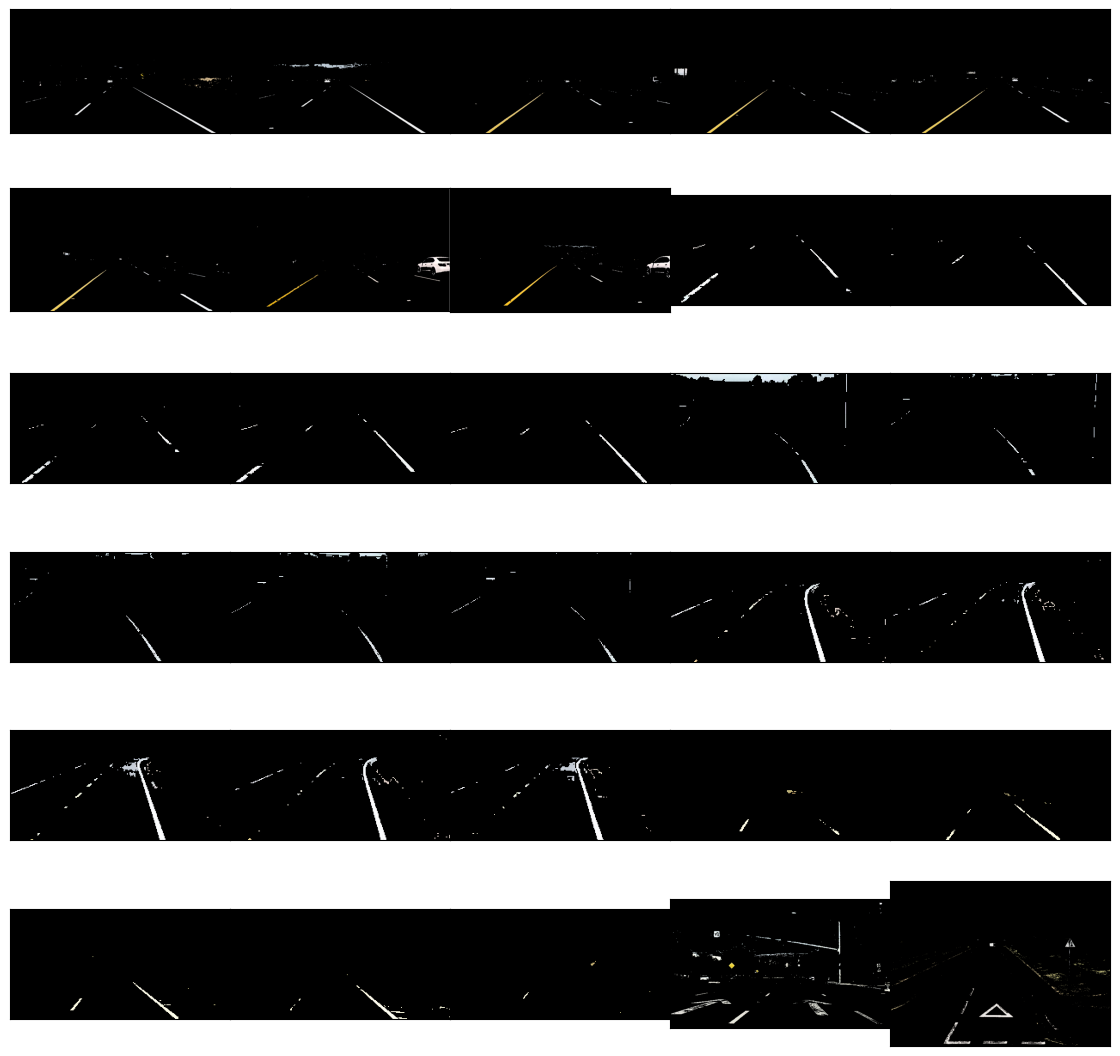

In [43]:
display_images(list(map(apply_color_selection, images_list)))

### HSL color space

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


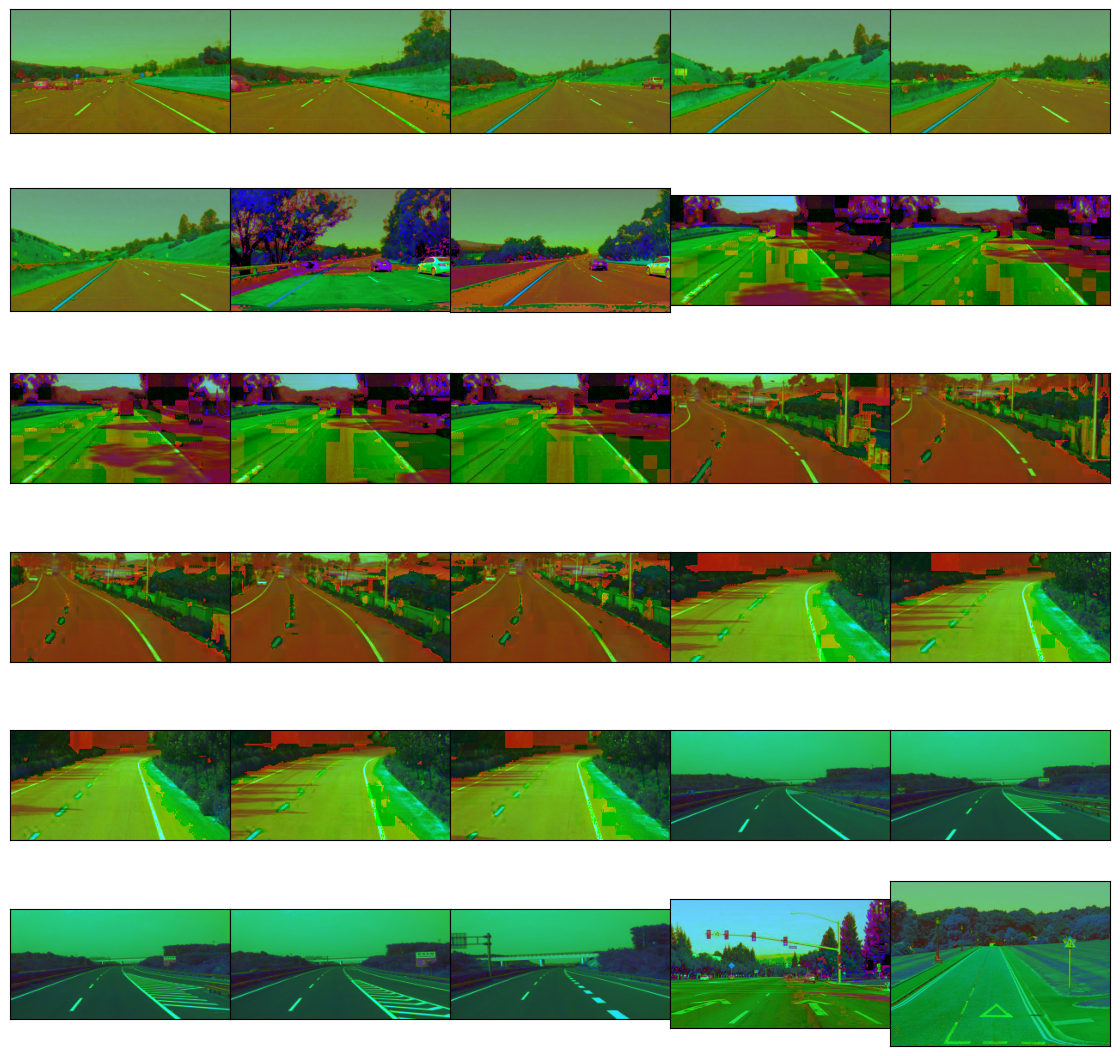

In [44]:
def convert_rgb_to_hsl(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

display_images(list(map(convert_rgb_to_hsl, images_list)))

In [45]:
def hsl_select_lane_lines(image):
    # Convert the input image to HSL color space
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

    # Define the lower and upper thresholds for white color
    white_lower = np.array([0, 200, 0], dtype=np.uint8)
    white_upper = np.array([255, 255, 255], dtype=np.uint8)

    # Define the lower and upper thresholds for yellow color
    yellow_lower = np.array([10, 0, 100], dtype=np.uint8)
    yellow_upper = np.array([40, 255, 255], dtype=np.uint8)

    # Create masks for white and yellow colors
    white_mask = cv2.inRange(hsl_image, white_lower, white_upper)
    yellow_mask = cv2.inRange(hsl_image, yellow_lower, yellow_upper)

    # Combine white and yellow masks
    combined_mask = cv2.bitwise_or(white_mask, yellow_mask)

    # Apply the mask to the original image
    image_masked = cv2.bitwise_and(image, image, mask=combined_mask)

    return image_masked


Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


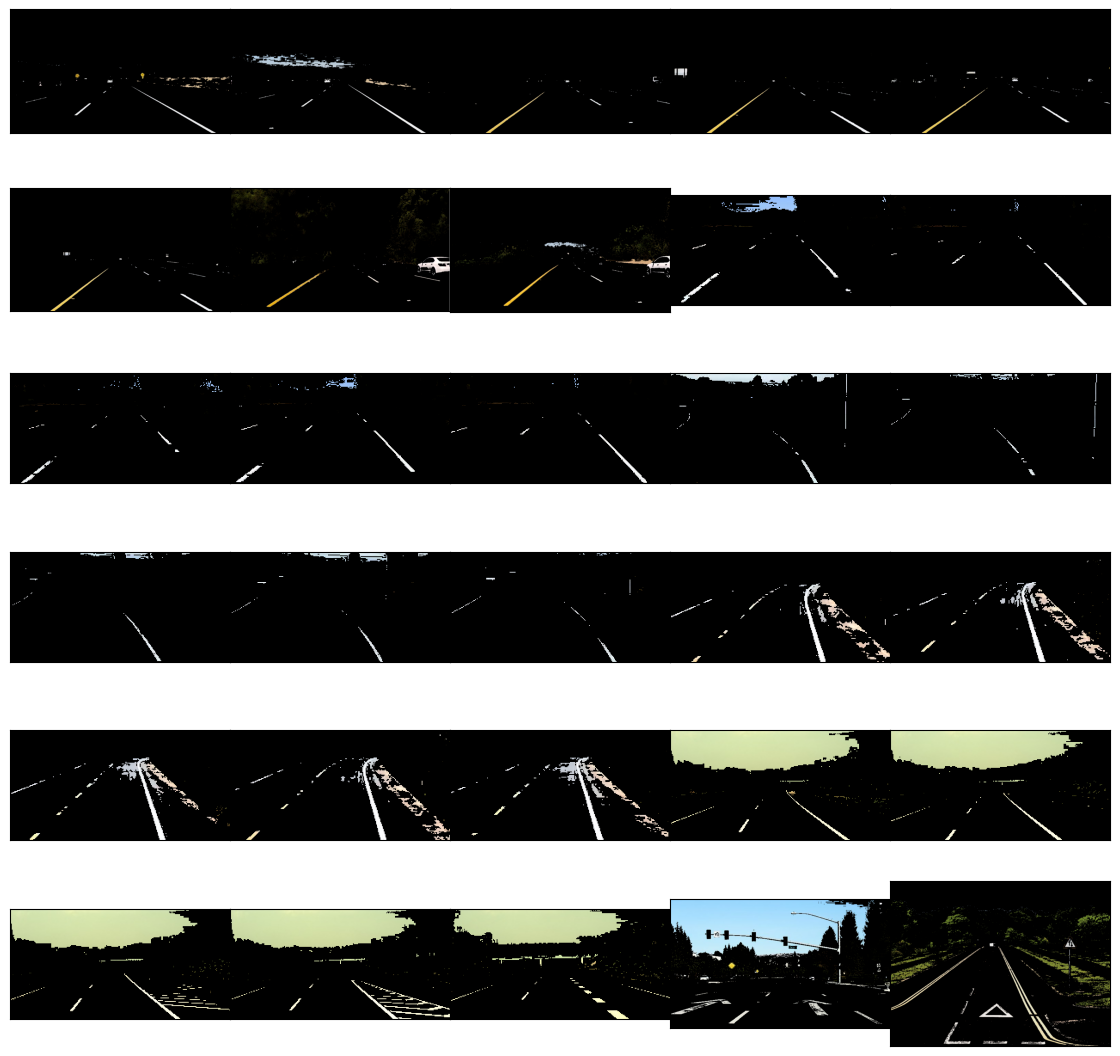

In [46]:
display_images(list(map(hsl_select_lane_lines, images_list)))

In [47]:
color_filtered_images = list(map(hsl_select_lane_lines, images_list))

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


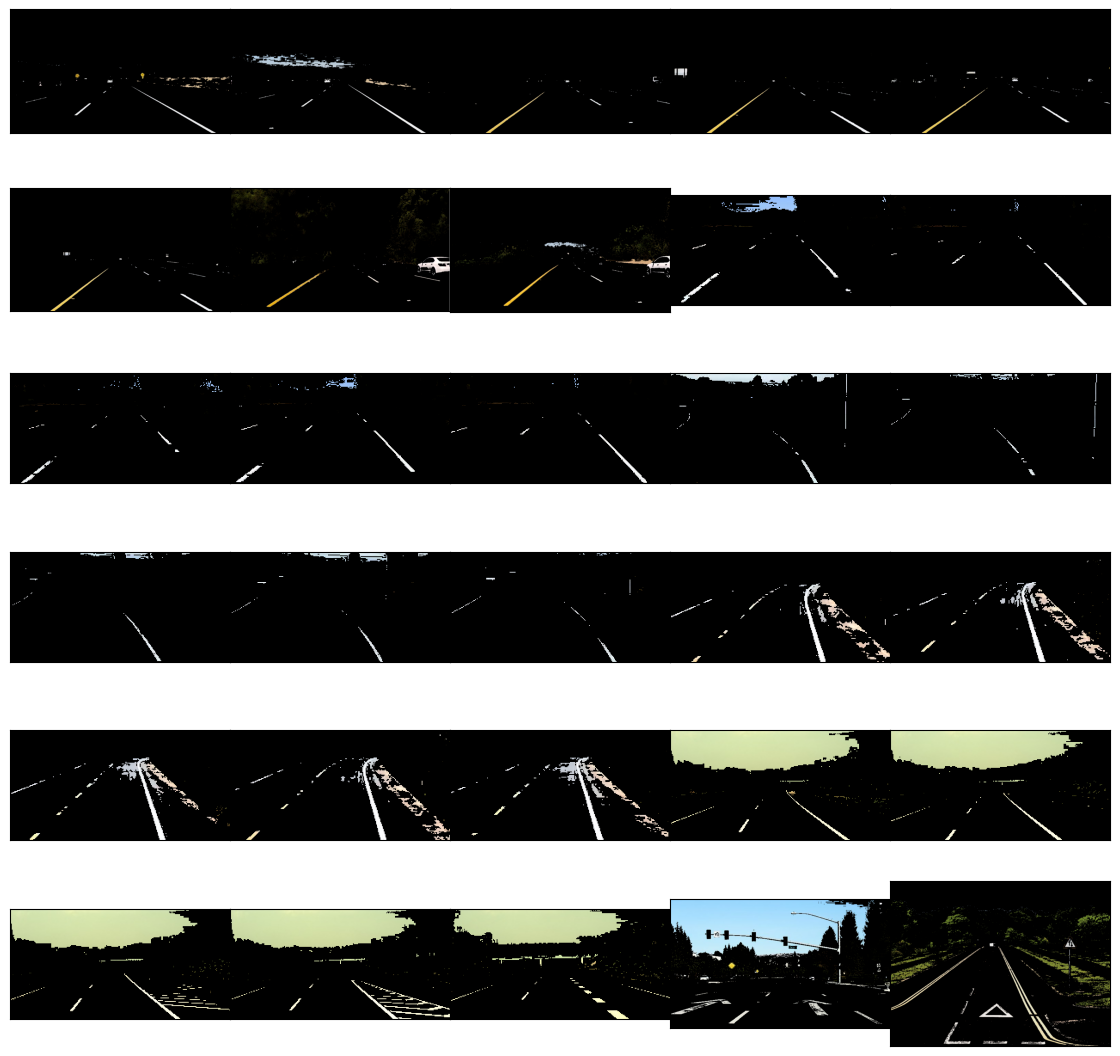

In [48]:
display_images(color_filtered_images)

## Canny Edge Detection

### Gray scaling the images

In [49]:
def convert_to_grey(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


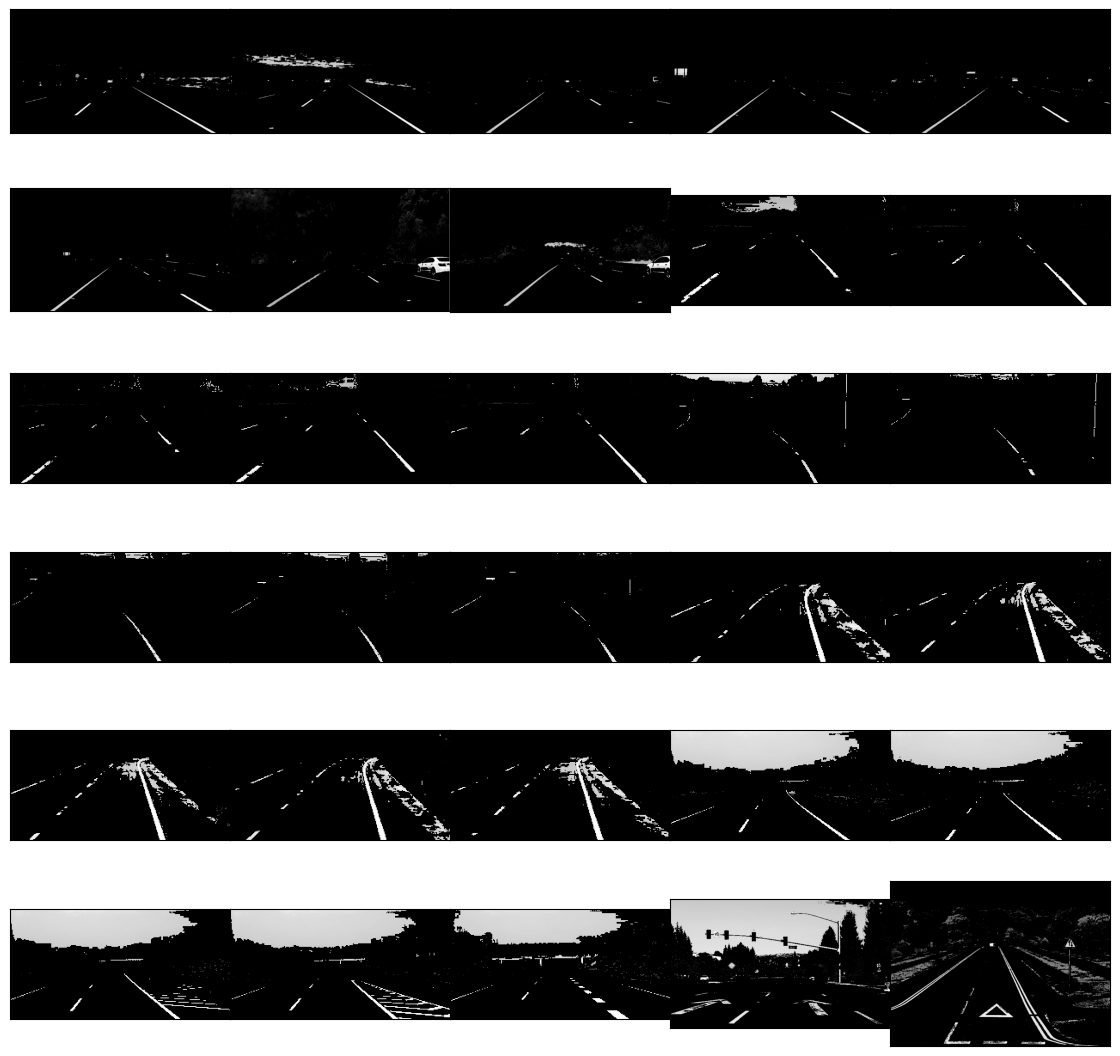

In [50]:
gray_images = list(map(convert_to_grey, color_filtered_images))
display_images(gray_images)

### Applying Gaussian smoothing

In [51]:
def function_gaussian_smoothing(img, ksize = 5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


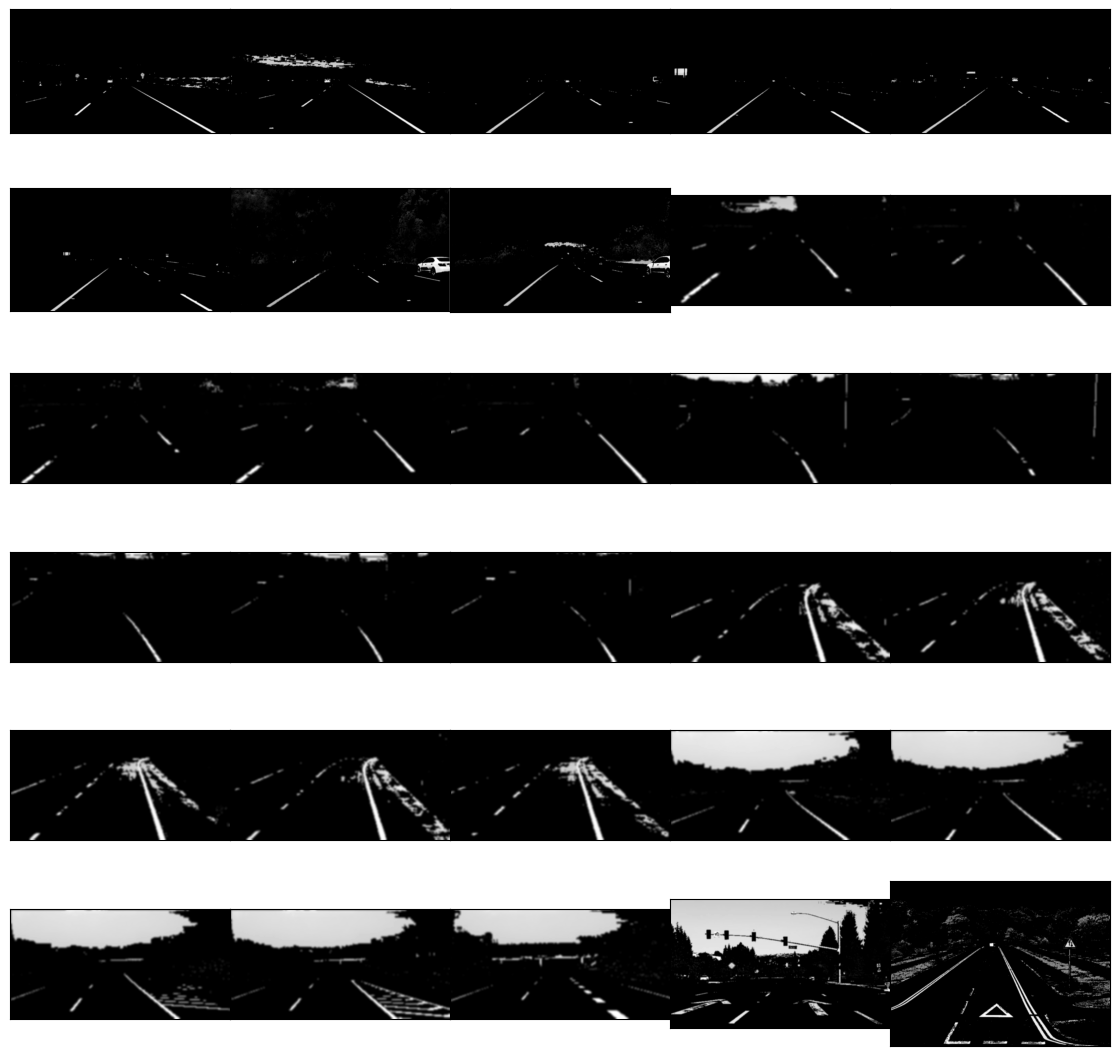

In [52]:
img_blur = list(map(function_gaussian_smoothing, gray_images))
display_images(img_blur)

### Applying Canny Edge Detection

In [53]:
def canny_detector(image, low_threshold = 30, high_threshold = 90):
    return cv2.Canny(image, low_threshold, high_threshold)

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


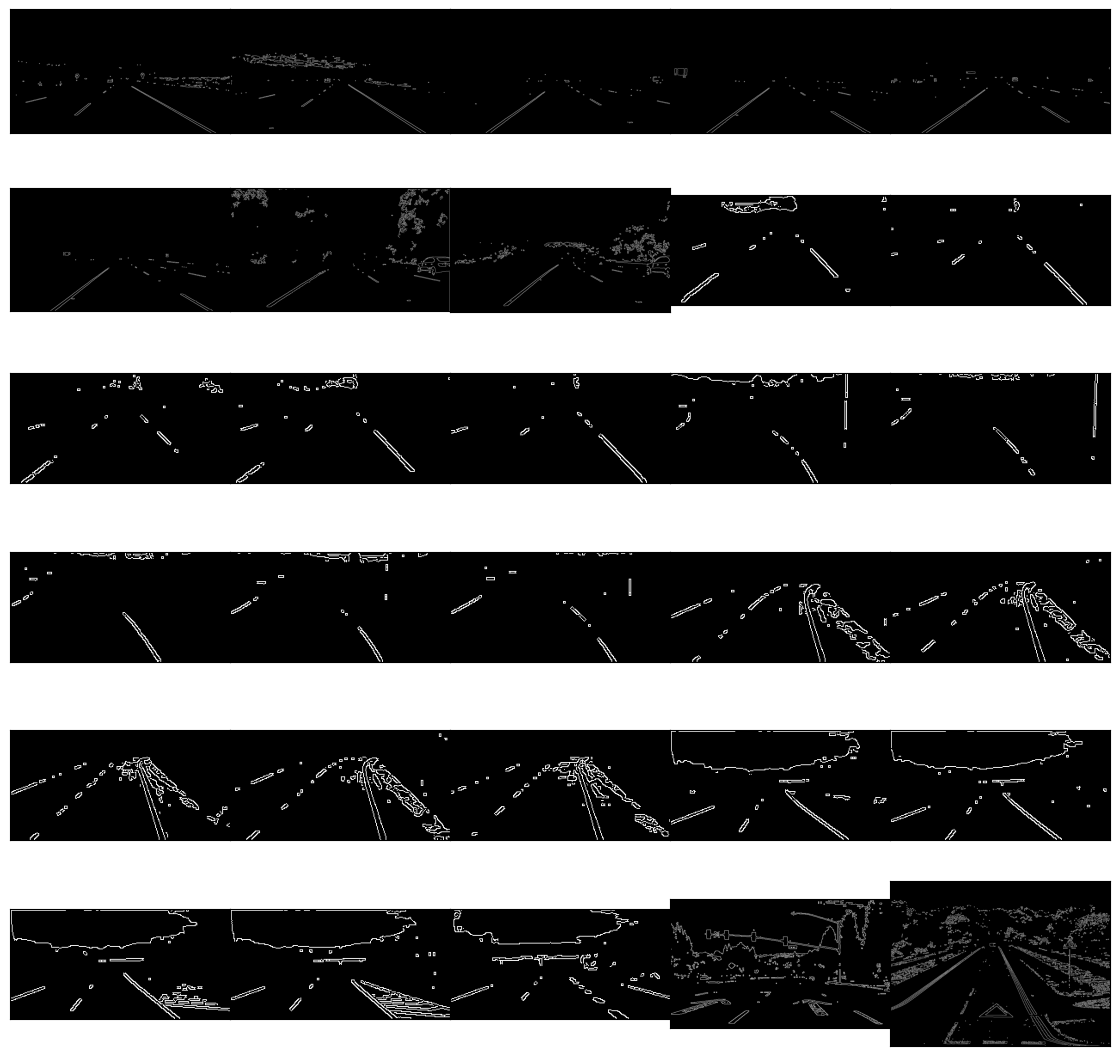

In [54]:
edge_detected_images = list(map(canny_detector, img_blur))
display_images(edge_detected_images)

## Region of interest

We're interested in the area facing the camera, where the lane lines are found. So, we'll apply region masking to cut out everything else.

In [55]:
import cv2

def roi(img):
    # Defining the vertices of the polygon mask
    height, width = img.shape[:2]
    lower_left  = [width * 0.1, height * 0.95]
    upper_left     = [width * 0.4, height * 0.6]
    lower_right = [width * 0.9, height * 0.95]
    upper_right    = [width * 0.6, height * 0.6]
    mask_vertices = np.array([[lower_left, upper_left, lower_right, upper_right]], dtype=np.int32)
    # Creating a black mask with the same size as the input image
    mask = np.zeros_like(img)
    # Filling the mask with the polygon defined by the vertices
    cv2.fillPoly(mask, [mask_vertices], (255, 255, 255))
    # Applying the mask to the input image using the bitwise AND operator
    image_masked_through_roi = cv2.bitwise_and(img, mask)
    # Returninng the masked image
    return image_masked_through_roi

Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


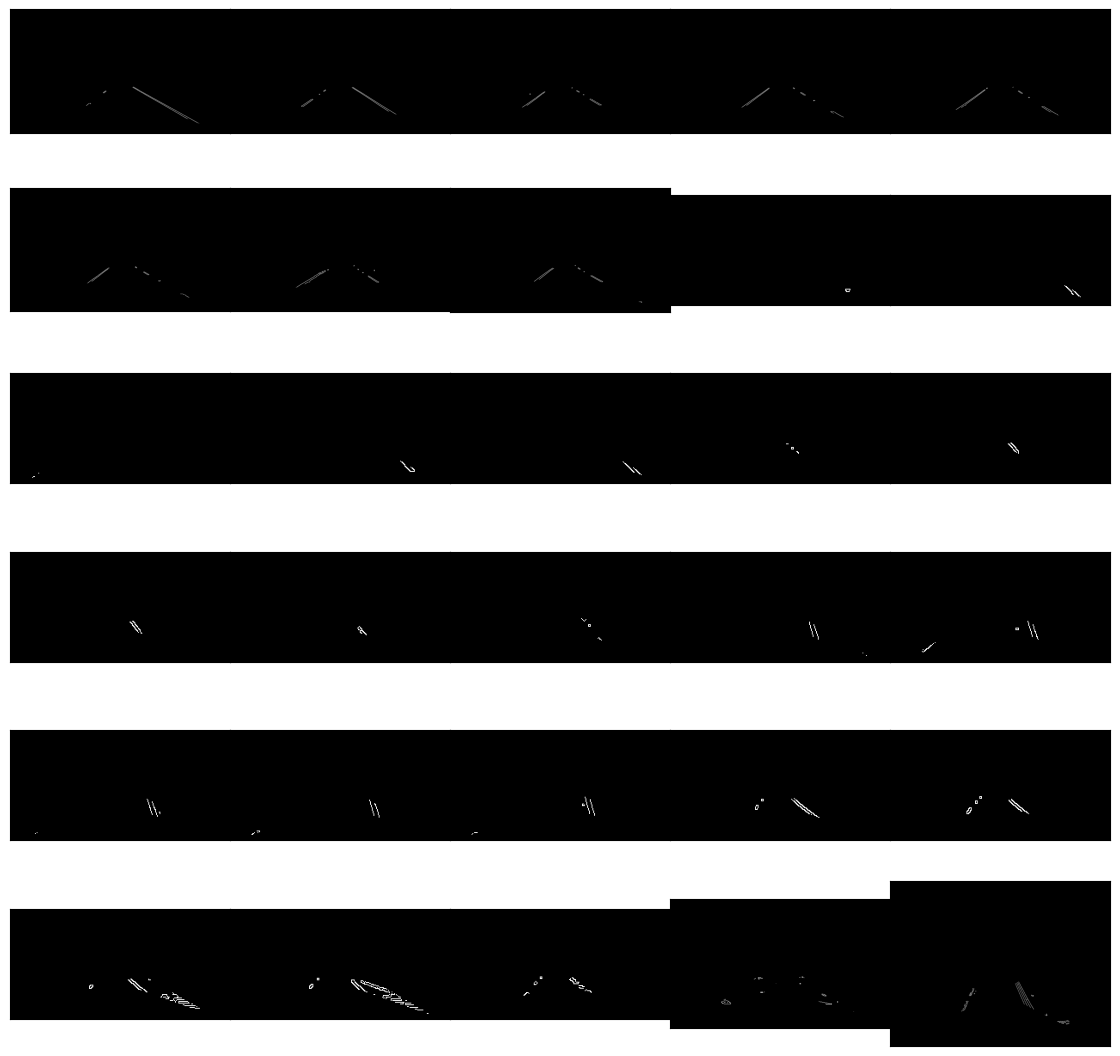

In [56]:
masked_image = list(map(roi, edge_detected_images))
display_images(masked_image)

## Hough Transform

**From this point onwards, code has been directly taken from the primary source with minor changes as we tried in several ways but got errors**

In [57]:
def hough_transform(image):
    rho = 2              #Distance resolution of the accumulator in pixels.
    theta = np.pi/180    #Angle resolution of the accumulator in radians.
    threshold = 20       #Only lines that are greater than threshold will be returned.
    minLineLength = 20   #Line segments shorter than that are rejected.
    maxLineGap = 300     #Maximum allowed gap between points on the same line to link them
    return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
                           minLineLength = minLineLength, maxLineGap = maxLineGap)

In [58]:
hough_lines = list(map(hough_transform, masked_image))

In [59]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=2):
    if image is None:
        return None
    
    image = np.copy(image)
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)

    return image


Number of input images: 30
Number of subplots: 30
Processing subplot 1
Processing subplot 2
Processing subplot 3
Processing subplot 4
Processing subplot 5
Processing subplot 6
Processing subplot 7
Processing subplot 8
Processing subplot 9
Processing subplot 10
Processing subplot 11
Processing subplot 12
Processing subplot 13
Processing subplot 14
Processing subplot 15
Processing subplot 16
Processing subplot 17
Processing subplot 18
Processing subplot 19
Processing subplot 20
Processing subplot 21
Processing subplot 22
Processing subplot 23
Processing subplot 24
Processing subplot 25
Processing subplot 26
Processing subplot 27
Processing subplot 28
Processing subplot 29
Processing subplot 30


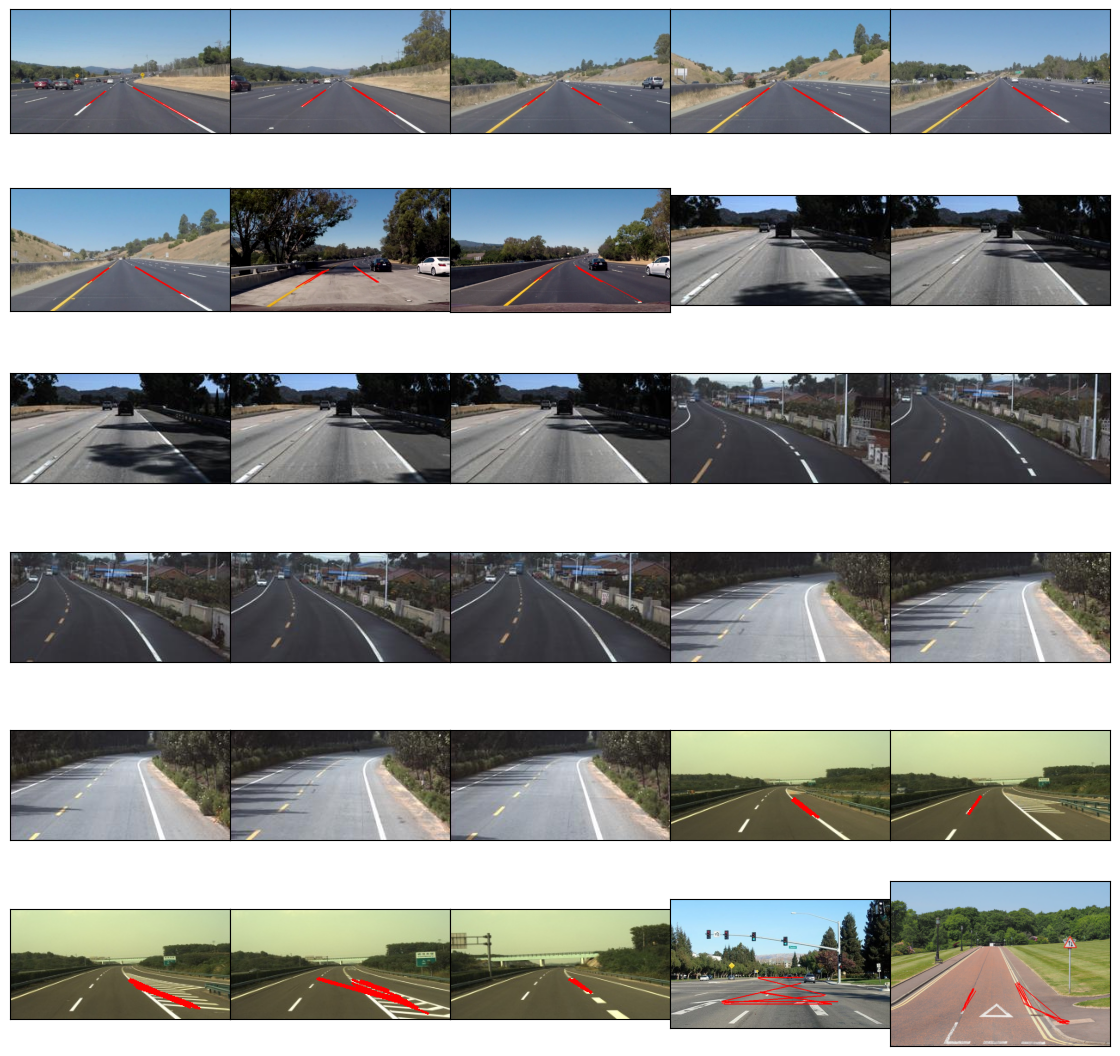

In [60]:
line_images = []
for image, lines in zip(images_list, hough_lines):
    line_images.append(draw_lines(image, lines))
    
display_images(line_images)